In [2]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_true = np.array([0,1,1,0,1])
y_scores = np.array([0.5, 0.6, 0.38, 0.9, 1])

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(precision)
print(recall)

[0.6        0.5        0.66666667 0.5        1.         1.        ]
[1.         0.66666667 0.66666667 0.33333333 0.33333333 0.        ]


+ precision: how many positive values were correctly gotten
+ recall: how many actual positive values were gotten

***

*Feature extraction*

In [15]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

categories = ["alt.atheism"]
newsgroups_train = fetch_20newsgroups(subset="train", categories=categories)

count_vect = CountVectorizer()

train_counts = count_vect.fit_transform(newsgroups_train.data)


In [19]:
count_vect.vocabulary_.get(u"man")

6941

***

*Cross-validation*

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

diabets = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(309, 10) (309,)
(133, 10) (133,)


In [29]:
clf = svm.SVC(kernel="linear", C=1)

scores = cross_val_score(clf, diabets.data, diabets.target, cv=4)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


[0.         0.00900901 0.03636364 0.04545455]
Accuracy: 0.02 (+/- 0.02)


***

In [30]:
import numpy as np

a = np.arange(22)

print(np.linalg.norm(a))
print(np.linalg.norm(a,1))

57.54128952326321
231.0


***

In [1]:
import numpy as np
x = np.array([0, 1, 4, 5, 6, 8, 8, 9, 11, 10, 19, 19.2, 19.7, 3])
for i in [70, 90, 95, 99]:
    print(i, np.percentile(x, i))

70 10.1
90 19.14
95 19.375
99 19.635


***

In [3]:
import pandas as pd
from lxml import objectify

xml = objectify.parse(open("utilities/book.xml"))
root = xml.getroot()

In [7]:
root.book[0].author

'Gambardella, Matthew'

In [13]:
df = pd.DataFrame(columns=("Author", "Title", "Genre"))
for i in range(0, 1):
    row = dict(zip(["Author", "Title", "Genre"], [ 
               root.book[i].author, root.book[i].title, root.book[i].genre]))
    rowSeries = pd.Series(row)
    rowSeries.name = i
    df = df.append(rowSeries)

In [14]:
df

,Author,Title,Genre
0,"[[[Gambardella, Matthew]]]",[[[XML Developer's Guide]]],[[[Computer]]]


***

In [21]:
import pandas as pd
url = 'http://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'
dfs = pd.read_html(url)
print(dfs) 

[                         Bank NameBank           CityCity StateSt  CertCert  \
0                    Almena State Bank             Almena      KS     15426   
1           First City Bank of Florida  Fort Walton Beach      FL     16748   
2                 The First State Bank      Barboursville      WV     14361   
3                   Ericson State Bank            Ericson      NE     18265   
4     City National Bank of New Jersey             Newark      NJ     21111   
..                                 ...                ...     ...       ...   
558                 Superior Bank, FSB           Hinsdale      IL     32646   
559                Malta National Bank              Malta      OH      6629   
560    First Alliance Bank & Trust Co.         Manchester      NH     34264   
561  National State Bank of Metropolis         Metropolis      IL      3815   
562                   Bank of Honolulu           Honolulu      HI     21029   

                 Acquiring InstitutionAI Closing D

***

In [35]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
path1 = '42.974049,-81.205203|42.974298,-81.195755'
response=requests.get('http://maps.googleapis.com/maps/api/elevation/json?locations='+path1+'&sensor=false')
# response = requests.get(request)
elevations = response.text

In [ ]:
# data = pd.read_json(elevations)
# print json_normalize(data['results'])

***

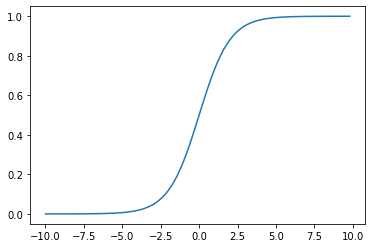

In [39]:
from scipy.special import expit #The expit function, also known as the logistic sigmoid function
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10., 0.2)
sig = expit(x)
plt.plot(x, sig)
plt.show()



***

In [40]:
# NetworkX, which provides support for direct, indirect and multigraphs

import networkx as nx

G = nx.Graph()
G.add_edges_from([(1,2),(1,3)])
c = nx.connected_components(G)

***

In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
irisNP = iris.data
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)

In [43]:
# group by target category
irisDF['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype='category')

In [44]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   group              150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [45]:
#mean, std, quantile
print (irisDF.mean(numeric_only=True))
print (irisDF.std())
print (irisDF.quantile(np.array([0, .25, 0.50, .75, .90, .99])))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3             2.000               1.00               0.1
0.25                5.1             2.800               1.60               0.3
0.50                5.8             3.000               4.35               1.3
0.75                6.4             3.300               5.10               1.8
0.90                6.9             3.610               5.80               2.2
0.99                7.7             4.151               6.70               2.5


***

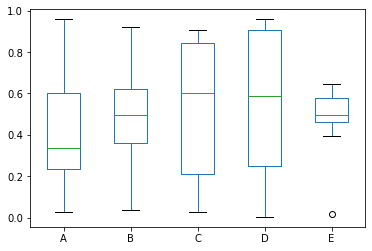

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot(kind='box')
plt.show()

***

In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
irisNP = iris.data
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
# group by target category
irisDF['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype='category')


In [48]:
print (irisDF.cov())
print (irisDF.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  


***

In [ ]:
import tweepy, json
CONSUMER_KEY = 'mX------------------------------------'
CONSUMER_SECRET = '------------------------------------------------------------------------'
ACCESS_KEY = '-----------------------------------------------------------------------'
ACCESS_SECRET = '---------------------------------------------------------'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)
trends1 = api.trends_place(1)
print trends1

***

In [ ]:
from linkedin import linkedin
API_KEY = '-------'
API_SECRET = '---'
RETURN_URL = 'http://localhost:8000'
authentication = linkedin.LinkedInAuthentication(API_KEY, API_SECRET, RETURN_URL,
linkedin.PERMISSIONS.enums.values())
print authentication.authorization_url # open this url on your browser
application = linkedin.LinkedInApplication(authentication)
authentication.authorization_code = ‘-----------------------------------'
authentication.get_access_token()
connections = application.get_connections()
print connections

***

In [ ]:
import facebook
# how to get the access token https://developers.facebook.com/docs/graph-api/overview
graph = facebook.GraphAPI(oauth_access_token)
profile = graph.get_object("me")
friends = graph.get_connections("me", "friends")
graph.put_object("me", "feed", message="Posting in my wall")

***

In [ ]:
from pyspark import SparkContext
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF
sc = SparkContext()
# Load documents (one per line).
documents = sc.textFile("...").map(lambda line: line.split(" "))
#hash the terms and compute the TF on documents
hashingTF = HashingTF()
tf = hashingTF.transform(documents)
# force the real computation
tf.cache()
# compute the global IDF: ignore too rare terms < 2 documents
idf = IDF(minDocFreq=2).fit(tf)
# do the TFxIDF in a distributed fashion
tfidf = idf.transform(tf)

***

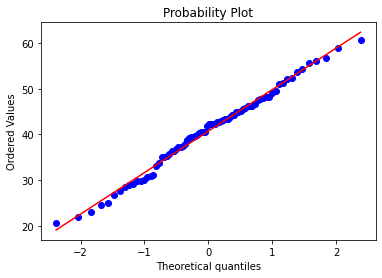

In [2]:
import numpy as np
import pylab
import scipy.stats as stats

measurements = np.random.normal(loc=40, scale=10, size=80)
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

K-Neighbors implementation

+ Obtaining the data
+ Querying the nearest neighbors

In [14]:
from collections import Counter
class KNN:
    def __init__(self):
        self.x = None # training data
        self.y = None # gold labes
        
    # O(1) Space and Time complexity
    def train(self, x, y):
        self.x = x
        self.y = y
    
    def get_distance(point_1, point_2):
        return np.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)
    
    # Regression
    def predict(self, x, k):
        distance_label = [
            (self.distance(x, train_point), train_label) 
                          for train_point, train_label 
                          in zip(self.x, self.y)]
        
        neighbors = sorted(distance_label)[:k]  # k is the number of neighbors to query        
        
        return (sum(label for _, label in neighbors) / k)
    
    # Classification
    def predict_class(self, x, k):
        distance_label = [(self.distance(x, train_point), train_label),
                         for train_point, train_label in zip(self.x, self.y)]
        
        neighbors = sorted(distance_label)[:k]  # k is the number of neighbors to query        
        
        neighbors_labels = [label for dist, label in neighbors]
        
        return Counter(neighbors_labels.most_common()[0][0])

SyntaxError: invalid syntax (<ipython-input-14-7f5412bab29e>, line 29)

In [5]:
?sorted